Préparation de l'environnement de travail

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Modèles
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

Chargement et exploration des données

In [10]:
data = pd.read_csv("./billets.csv", sep=";")

In [12]:
# Afficher les premières lignes
print(data.head())

# Informations sur le dataset
print(data.info())

# Statistiques descriptives
print(data.describe())

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length    

In [13]:
# Vérifier les valeurs manquantes
print(data.isnull().sum())

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64


is_genuine
True     1000
False     500
Name: count, dtype: int64


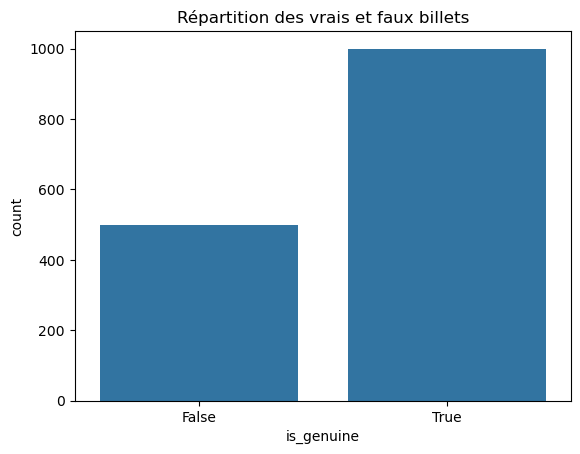

In [14]:
print(data['is_genuine'].value_counts())
sns.countplot(x='is_genuine', data=data)
plt.title("Répartition des vrais et faux billets")
plt.show()

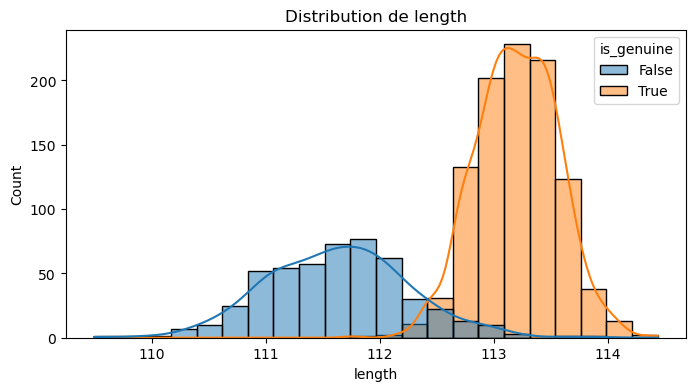

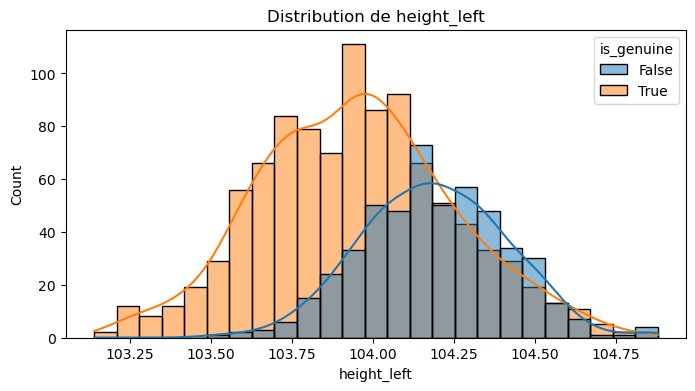

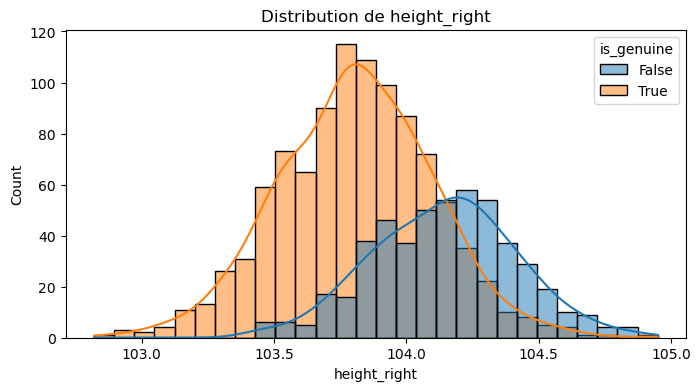

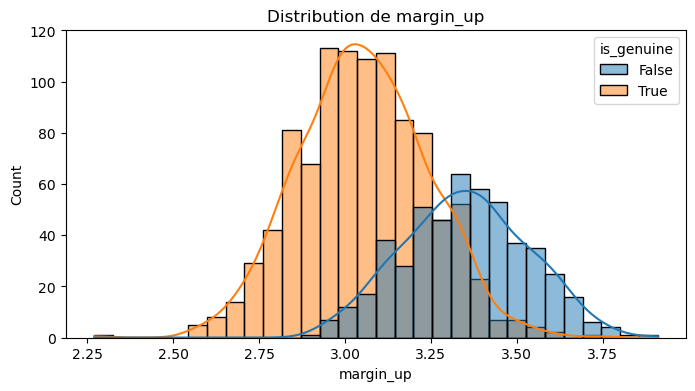

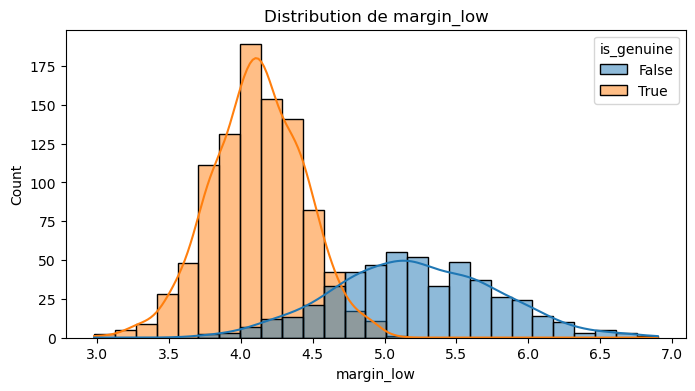

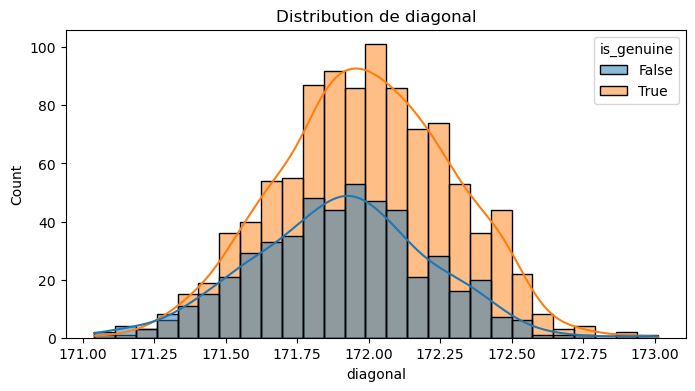

In [20]:
# Histogrammes pour chaque caractéristique
variables = ['length', 'height_left', 'height_right', 'margin_up', 'margin_low', 'diagonal']
for variables in variables:
    plt.figure(figsize=(8, 4))
    sns.histplot(data, x=variables, hue='is_genuine', kde=True)
    plt.title(f"Distribution de {variables}")
    plt.show()

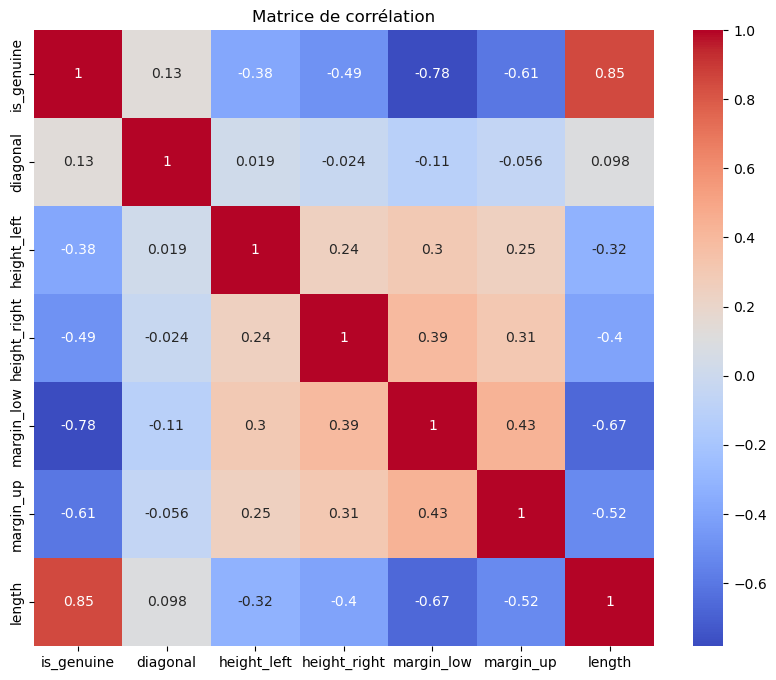

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

Prétraitement des données

In [18]:
# Suppression des lignes avec des valeurs manquantes
data_clean = data.dropna()

In [40]:
data_clean['is_genuine'].value_counts()

is_genuine
True     971
False    492
Name: count, dtype: int64

Division des données en ensembles d'entraînement et de test

In [21]:
# Définir les caractéristiques
X = data_clean.drop('is_genuine', axis=1)

# Définir la cible
y = data_clean['is_genuine']

In [22]:
display(X.head())
display(y.head())

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.46,103.36,103.66,3.77,2.99,113.09
2,172.69,104.48,103.50,4.40,2.94,113.16
3,171.36,103.91,103.94,3.62,3.01,113.51
4,171.73,104.28,103.46,4.04,3.48,112.54


0    True
1    True
2    True
3    True
4    True
Name: is_genuine, dtype: bool

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y)

In [27]:
print("Dimensions de X :", X.shape)
print("Dimensions de X_train :", X_train.shape)
print("Dimensions de X_test :", X_test.shape)

Dimensions de X : (1463, 6)
Dimensions de X_train : (1170, 6)
Dimensions de X_test : (293, 6)


In [44]:
print("Répartition des classes dans y_train :")
print(y_train.value_counts())

print("Répartition des classes dans y_test :")
print(y_test.value_counts())


Répartition des classes dans y_train :
is_genuine
True     777
False    393
Name: count, dtype: int64
Répartition des classes dans y_test :
is_genuine
True     194
False     99
Name: count, dtype: int64


Normalisation des données

standardisation aux données pour KNN

In [52]:
print("Moyenne des caractéristiques avant standardisation :")
print(X_train.mean)

print("\nÉcart-type des caractéristiques avant standardisation :")
print(X_train.std)

Moyenne des caractéristiques avant standardisation :
diagonal        171.964769
height_left     104.037222
height_right    103.918726
margin_low        4.493906
margin_up         3.155282
length          112.679402
dtype: float64

Écart-type des caractéristiques avant standardisation :
diagonal        0.302297
height_left     0.303464
height_right    0.323510
margin_low      0.663733
margin_up       0.228967
length          0.877594
dtype: float64


In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
print("Moyenne des caractéristiques après standardisation :")
print(X_train_scaled.mean(axis=0))

print("\nÉcart-type des caractéristiques après standardisation :")
print(X_train_scaled.std(axis=0))


Moyenne des caractéristiques après standardisation :
[-1.07575867e-13 -1.31769239e-14 -2.20086058e-14 -1.63060448e-15
  4.23592785e-16  8.44756364e-15]

Écart-type des caractéristiques après standardisation :
[1. 1. 1. 1. 1. 1.]
